## Importação das bibliotecas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

## Importação das bibliotecas para a Machine Learning

In [78]:
#transforma variaveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
##cria dois grupos para a machine learning
from sklearn.model_selection import train_test_split
##verifica o acerto ou erro da machine learning
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
##importação da biblioteca LogisticRegression
from sklearn.linear_model import LogisticRegression
##importação da biblioteca ConfusionMatrix
from yellowbrick.classifier import ConfusionMatrix
##importação da biblioteca para CrossValidation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


### Carregar variáveis

In [79]:
solvers = {
           'lbfgs': ['l2', None],
           'liblinear': ['l1', 'l2'],
           'newton-cg': ['l2', None],
           'newton-cholesky': ['l2', None],
           'sag': ['l2', None],
           'saga': ['elasticnet', 'l1', 'l2', None]
           }

#tipos de solver {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, padrão = 'lbfgs'
#tipos de penalty {'l1', 'l2', 'elasticnet', Nenhum}, padrão='l2'
#A escolha do algoritmo depende da penalidade escolhida. Penalidades suportadas pelo solucionador:
#'lbfgs' - ['l2', Nenhum]
#'liblinear' - ['l1', 'l2']
#'newton-cg' - ['l2', Nenhum]
#'newton-cholesky' - ['l2', Nenhum]
#'sag' - ['l2', Nenhum]
#'saga' - ['elasticnet', 'l1', 'l2', Nenhum]



## Carregamento da base de dados

In [80]:
df = pd.read_csv('data/conjunto_de_dados_de_funcionarios.csv')
df.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1


## Verificar a existência dos valores duplicados e efetuar a remoção

In [81]:
df.duplicated().sum()

1889

In [82]:
df[df.duplicated()]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [83]:
df.drop_duplicates(inplace = True) #Dropping Duplicates
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [84]:
df.duplicated().sum()

0

# Machine Learning

## Pré-processamento da base de dados

In [85]:

#Transformar as variáveis categóricas em variáveis numéricas
le=LabelEncoder()
df["Education"]= le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])

df


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,2,31,0,0,2,0
4647,0,2016,2,3,30,1,0,2,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1


## Separar a base em dados de treino e dados de testes

In [86]:
X= df.drop(columns='LeaveOrNot')
y=df['LeaveOrNot']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.25)

## Criação do modelo de Regressão Logística (PARTE 1)

In [88]:
model = LogisticRegression(random_state=1, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs",multi_class='auto')
model.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=500, random_state=1)

## Matriz de confusão

c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6589483839845635

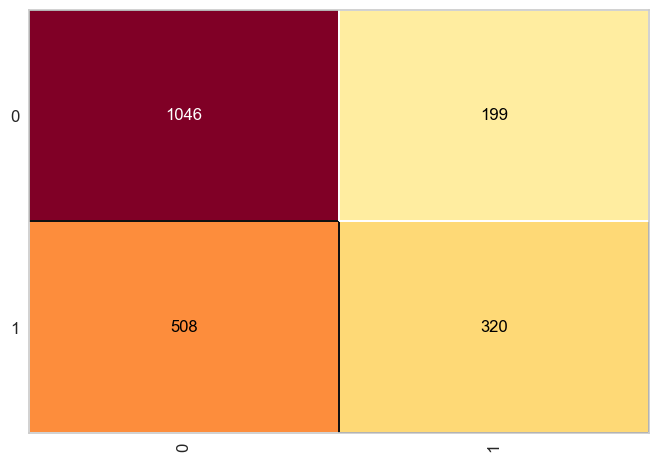

In [89]:
y_pred = model.predict(X_test)
b = accuracy_score(y_test, y_pred)


###Mapa de calor para o treino
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_train,y_train)


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6512301013024602

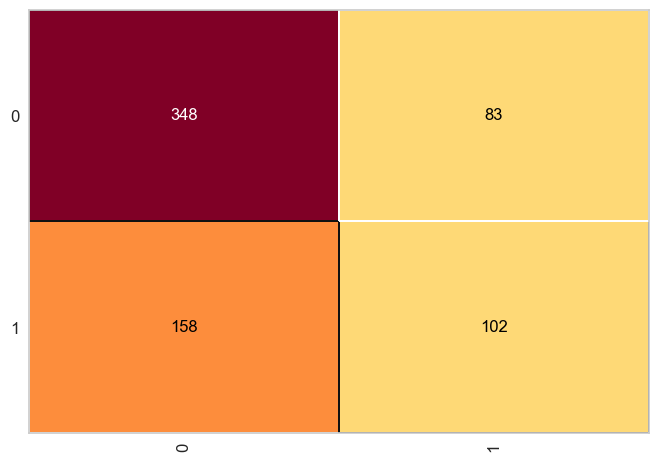

In [90]:
###Mapa de calor para o teste
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test,y_test)

# PARTE 2
## Validação cruzada

In [91]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)


In [92]:
# Criando o modelo

model = LogisticRegression(random_state=1, max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs",multi_class='auto')
resultado = cross_val_score(model, X_train, y_train, cv = kfold);

# Calculando a média para a validação
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0));
#Checkpoint 3
#tipos de solver {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, padrão = 'lbfgs'
#tipos de penalty {'l1', 'l2', 'elasticnet', Nenhum}, padrão='l2'
#A escolha do algoritmo depende da penalidade escolhida. Penalidades suportadas pelo solucionador:
#'lbfgs' - ['l2', Nenhum]
#'liblinear' - ['l1', 'l2']
#'newton-cg' - ['l2', Nenhum]
#'newton-cholesky' - ['l2', Nenhum]
#'sag' - ['l2', Nenhum]
#'saga' - ['elasticnet', 'l1', 'l2', Nenhum]


Acurácia Média: 66.13%


In [93]:
resultados_reg_logistica = []
for i in range(30):
  print(i)
  kfold = KFold(n_splits=30, shuffle=True, random_state=i)

  model = LogisticRegression(max_iter=500, penalty="l2",tol=0.0001, C=1,solver="lbfgs",multi_class='auto')
  scores = cross_val_score(model, X_train, y_train, cv = kfold)
  resultados_reg_logistica.append(scores.mean())
#A escolha do algoritmo depende da penalidade escolhida. Penalidades suportadas pelo solucionador:
#'lbfgs' - ['l2', Nenhum]
#'liblinear' - ['l1', 'l2']
#'newton-cg' - ['l2', Nenhum]
#'newton-cholesky' - ['l2', Nenhum]
#'sag' - ['l2', Nenhum]
#'saga' - ['elasticnet', 'l1', 'l2', Nenhum]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [94]:
resultados_reg_logistica

[0.6550586611456178,
 0.6536714975845411,
 0.6565907522429261,
 0.6574534161490683,
 0.6531608005521048,
 0.6613250517598346,
 0.6565838509316768,
 0.653664596273292,
 0.6608212560386474,
 0.6575224292615598,
 0.6571221532091097,
 0.6536024844720495,
 0.6541683919944788,
 0.655024154589372,
 0.6574672187715667,
 0.6568944099378881,
 0.6551000690131126,
 0.6550034506556247,
 0.6555555555555554,
 0.6521256038647343,
 0.6560869565217389,
 0.6521739130434784,
 0.652215320910973,
 0.6513250517598342,
 0.6574810213940648,
 0.6569496204278811,
 0.6565079365079366,
 0.6575362318840579,
 0.6579986197377503,
 0.6517253278122842]

In [95]:
## Procurando melhor combinação

In [103]:
resultados_reg_logistica_dict = {}
model: LogisticRegression
for k, v in solvers.items():
    for item in v:
 
        model = LogisticRegression(random_state=1, max_iter=500,tol=0.0001, penalty=item,C=1,solver=k,multi_class='auto')
     
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        b = accuracy_score(y_test, y_pred)

        # Separando os dados em folds
        kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

        # Criando o modelo
        
        model = LogisticRegression(random_state=1, max_iter=500,tol=0.0001, C=1,solver=k,multi_class='auto', penalty=item)
        
        resultado = cross_val_score(model, X_train, y_train, cv = kfold)

        #print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

        for j in range(30):
            ...
        kfold = KFold(n_splits=30, shuffle=True, random_state=i)

        model = LogisticRegression(max_iter=500, penalty=item,tol=0.0001, C=1,solver=k,multi_class='auto')


        scores = cross_val_score(model, X_train, y_train, cv = kfold)
        describe = '{}_{}'.format(k, item)
        resultados_reg_logistica_dict[describe] = (scores.mean())
        print('Combinação {} e {}: Acurácia {}'.format(k, item, (scores.mean()) ))

Combinação lbfgs e l2: Acurácia 0.6517253278122842
Combinação lbfgs e None: Acurácia 0.6570255348516217
Combinação liblinear e l1: Acurácia 0.6565424430641821
Combinação liblinear e l2: Acurácia 0.6546100759144238


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.

Combinação newton-cg e l2: Acurácia 0.6565838509316769


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converg

Combinação newton-cg e None: Acurácia 0.6575500345065562
Combinação newton-cholesky e l2: Acurácia 0.6570669427191167
Combinação newton-cholesky e None: Acurácia 0.6570669427191167


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Combinação sag e l2: Acurácia 0.6044306418219463


c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Combinação sag e None: Acurácia 0.6044306418219463


ValueError: l1_ratio must be specified when penalty is elasticnet.

In [104]:
resultados_reg_logistica_dict

{'lbfgs_l2': 0.6517253278122842,
 'lbfgs_None': 0.6570255348516217,
 'liblinear_l1': 0.6565424430641821,
 'liblinear_l2': 0.6546100759144238,
 'newton-cg_l2': 0.6565838509316769,
 'newton-cg_None': 0.6575500345065562,
 'newton-cholesky_l2': 0.6570669427191167,
 'newton-cholesky_None': 0.6570669427191167,
 'sag_l2': 0.6044306418219463,
 'sag_None': 0.6044306418219463}

In [111]:
atual = 0
melhor_combinacao = ''
for k, v in resultados_reg_logistica_dict.items():
    if v > atual: 
        atual = v
        melhor_combinacao = k

solver, penalty = melhor_combinacao.split(sep='_')
atual = '{:.2%}'.format(atual)
print('A melhor combinação é: penalty {} e solver {} com Acurácia de {}'.format(penalty, solver, atual))


A melhor combinação é: penalty None e solver newton-cg com Acurácia de 65.76%
